In [80]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import pickle
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [11]:
x_train = pd.read_csv(r'C:\Users\Dell\Desktop\Soham\Skybug-Movie-Genre-Classification\data\x_train.csv')
y_train = pd.read_csv(r'C:\Users\Dell\Desktop\Soham\Skybug-Movie-Genre-Classification\data\y_train.csv')
y_train = y_train['Genre'].values

print(x_train.shape)

(54214, 384)


In [12]:
x_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.100113,0.047543,-0.017568,0.022169,-0.008113,0.066285,0.044294,-0.001988,0.023515,-0.096185,...,0.017540,-0.043811,-0.008418,0.009575,0.004424,0.008141,0.030389,0.016892,0.053477,0.006697
1,-0.030218,0.053955,-0.115293,-0.023189,-0.023016,-0.004647,0.005791,-0.061413,0.050253,-0.013987,...,0.017131,-0.097131,0.016678,0.090240,-0.049587,0.036313,0.082832,-0.045983,0.112446,-0.038247
2,0.055413,0.067351,0.057936,0.040602,0.043434,-0.006236,0.001159,-0.051813,0.067461,-0.027024,...,0.019969,-0.039349,0.003698,0.012504,-0.134172,0.041827,-0.004911,0.070233,-0.081329,-0.061537
3,-0.051497,-0.011621,0.006114,-0.038689,-0.042185,0.065028,0.019505,0.038383,0.037409,-0.109517,...,0.027292,-0.039455,-0.035343,0.039774,-0.003396,0.129379,-0.002248,0.027673,0.096751,-0.032260
4,-0.044385,-0.024631,-0.002330,0.082546,0.054457,-0.025413,0.047433,-0.054462,-0.003557,-0.085276,...,0.063805,0.055537,-0.010916,0.055499,-0.081727,0.052276,0.066995,-0.018595,-0.091746,-0.009528


## Multinomial Naive Bayes

In [13]:
scaler = MinMaxScaler() 
scaler.fit(x_train)
x_t = scaler.transform(x_train)

NB = MultinomialNB(alpha=0.9)
NB.fit(x_t,y_train)

print("Training Accuracy: ",NB.score(x_t,y_train))


Training Accuracy:  0.5203637436824436


In [15]:
pickle.dump(NB, open('models/NB.pkl','wb'))

In [16]:
print(classification_report(y_train,NB.predict(x_t)))

              precision    recall  f1-score   support

      comedy       0.69      0.00      0.00      7447
 documentary       0.63      0.72      0.67     13096
       drama       0.52      0.64      0.57     13613
       other       0.45      0.67      0.54     14985
       short       0.00      0.00      0.00      5073

    accuracy                           0.52     54214
   macro avg       0.46      0.41      0.36     54214
weighted avg       0.50      0.52      0.46     54214



## SVM

### Sigmoid

In [17]:
svm_sig = SVC(C=1.0, kernel='sigmoid', degree=3, gamma='auto')
svm_sig.fit(x_train,y_train)

print("Training Accuracy: ",svm_sig.score(x_train,y_train))

Training Accuracy:  0.5411148411849338


In [18]:
pickle.dump(svm_sig, open('models/SVM_sig.pkl','wb'))

In [19]:
print(classification_report(y_train,svm_sig.predict(x_train)))

              precision    recall  f1-score   support

      comedy       1.00      0.00      0.00      7447
 documentary       0.62      0.79      0.70     13096
       drama       0.51      0.70      0.59     13613
       other       0.50      0.62      0.56     14985
       short       0.00      0.00      0.00      5073

    accuracy                           0.54     54214
   macro avg       0.53      0.42      0.37     54214
weighted avg       0.55      0.54      0.47     54214



### RBF

In [20]:
svm_rbf = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
svm_rbf.fit(x_train,y_train)

print("Training Accuracy: ",svm_rbf.score(x_train,y_train))

Training Accuracy:  0.5550595787066072


In [21]:
pickle.dump(svm_rbf, open('models/SVM_rbf.pkl','wb'))

In [22]:
print(classification_report(y_train,svm_rbf.predict(x_train)))

              precision    recall  f1-score   support

      comedy       0.74      0.04      0.07      7447
 documentary       0.63      0.81      0.71     13096
       drama       0.51      0.72      0.60     13613
       other       0.53      0.63      0.57     14985
       short       0.00      0.00      0.00      5073

    accuracy                           0.56     54214
   macro avg       0.48      0.44      0.39     54214
weighted avg       0.53      0.56      0.49     54214



## Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

print("Training Accuracy: ",lr.score(x_train,y_train))

Training Accuracy:  0.631866307595824


In [24]:
pickle.dump(lr, open('models/LR.pkl','wb'))

In [25]:
print(classification_report(y_train,lr.predict(x_train)))

              precision    recall  f1-score   support

      comedy       0.60      0.50      0.54      7447
 documentary       0.71      0.79      0.75     13096
       drama       0.60      0.68      0.63     13613
       other       0.62      0.64      0.63     14985
       short       0.55      0.28      0.37      5073

    accuracy                           0.63     54214
   macro avg       0.61      0.58      0.59     54214
weighted avg       0.63      0.63      0.62     54214



## NN model

In [27]:
if(torch.cuda.is_available()):
    device = torch.device('cuda:0')
else:    
    device = torch.device('cpu')

print(device)

cuda:0


In [41]:
y_train_coded = []
d = {'comedy':0, 'documentary':1, 'drama':2, 'other':3, 'short':4}

for i in y_train:
    y_train_coded.append(d[i])

print(y_train)
print(y_train_coded)

['drama' 'other' 'other' ... 'documentary' 'comedy' 'other']
[2, 3, 3, 2, 2, 1, 0, 3, 3, 3, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 2, 0, 0, 2, 3, 3, 4, 3, 3, 1, 3, 1, 3, 1, 3, 0, 2, 2, 0, 0, 1, 0, 4, 2, 3, 3, 1, 4, 2, 3, 1, 1, 0, 1, 3, 3, 1, 3, 0, 1, 2, 0, 3, 2, 3, 0, 3, 3, 4, 2, 1, 2, 3, 1, 3, 0, 0, 2, 3, 2, 3, 2, 3, 0, 3, 3, 3, 2, 1, 2, 1, 2, 3, 3, 3, 1, 2, 2, 2, 1, 1, 4, 1, 0, 3, 4, 3, 2, 3, 4, 1, 2, 1, 0, 3, 0, 0, 0, 3, 3, 2, 2, 1, 2, 3, 2, 0, 4, 0, 3, 1, 2, 3, 3, 3, 1, 2, 1, 3, 1, 2, 0, 0, 3, 1, 0, 1, 4, 3, 1, 0, 4, 0, 0, 1, 1, 2, 3, 3, 2, 2, 1, 1, 3, 2, 3, 2, 3, 2, 1, 3, 3, 2, 3, 1, 3, 3, 2, 4, 2, 2, 2, 2, 1, 3, 0, 0, 3, 2, 3, 3, 1, 0, 3, 3, 0, 3, 0, 1, 3, 3, 2, 2, 2, 2, 1, 4, 1, 0, 3, 0, 3, 2, 2, 3, 1, 2, 0, 1, 2, 1, 3, 1, 0, 1, 2, 4, 1, 0, 4, 3, 1, 1, 3, 3, 3, 1, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 0, 3, 1, 2, 1, 1, 1, 1, 4, 4, 4, 2, 3, 3, 3, 4, 3, 0, 2, 4, 1, 1, 3, 3, 4, 2, 2, 0, 1, 4, 3, 0, 3, 1, 3, 2, 2, 2, 3, 3, 2, 3, 1, 3, 3, 3, 3, 0, 1, 2, 1, 4, 3, 4, 1, 2, 2, 3, 0, 3, 0, 2, 0, 4, 2, 3,

In [82]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x.astype(np.float32))
        self.y = torch.tensor(y)
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
train_dataset = Dataset(x_train.to_numpy().astype(np.float32), y_train_coded)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=25, shuffle=True)

#_______________________________________________________________________________

class Net(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, num_stacked_layers):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.lstm = nn.LSTM(hidden_size1, hidden_size2, num_stacked_layers, batch_first=True)
        self.fc2 = nn.Linear(hidden_size2, output_size)
        self.softmax = nn.Softmax(dim=1)
        self.num_stacked_layers = num_stacked_layers
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.input_size = input_size
        self.output_size = output_size

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size1).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size1).to(device)

        out = self.fc1(x)
        out = out.transpose(1, -1) 
        # out shape = [1,128]
        out, _ = self.lstm(out) 
        # out.shape = [1,64]
        out = self.fc2(out)
        out = self.softmax(out)
        return out


#_______________________________________________________________________________

def train_one_epoch(model, train_loader, loss_function, optimiser):
    model.train(True)
    running_loss = 0.0
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        y_pred = model(x)
        loss = loss_function(y_pred, y)
        running_loss += loss.item()
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    return running_loss / len(train_loader)

#_______________________________________________________________________________

model = Net(384, 128, 64, 5, 1)
model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
num_epochs = 100
batch_size = 1

all_losses = []

for epoch in range(num_epochs):
    loss = train_one_epoch(model, train_loader, loss_fn, optimiser)
    print(f'Epoch {epoch} loss: {loss}')
    all_losses.append(loss)

Epoch 0 loss: 1.3393157053895126
Epoch 1 loss: 1.3213993667072281
Epoch 2 loss: 1.3174827173592694
Epoch 3 loss: 1.3164583043109002
Epoch 4 loss: 1.3179780414655167
Epoch 5 loss: 1.3185843350756492
Epoch 6 loss: 1.3142961158682092
Epoch 7 loss: 1.3148075056933433
Epoch 8 loss: 1.3139179308000057
Epoch 9 loss: 1.312803721581807
Epoch 10 loss: 1.3126491768781134
Epoch 11 loss: 1.3137596199841146
Epoch 12 loss: 1.3096701546493572
Epoch 13 loss: 1.309610352971247
Epoch 14 loss: 1.3058841557148801
Epoch 15 loss: 1.3071218466857657
Epoch 16 loss: 1.3087116775286258
Epoch 17 loss: 1.3059995199689782
Epoch 18 loss: 1.303965824603375
Epoch 19 loss: 1.3066277447357986
Epoch 20 loss: 1.3102204918366744
Epoch 21 loss: 1.3109120947801336
Epoch 22 loss: 1.3071985157363808
Epoch 23 loss: 1.3086275681200639
Epoch 24 loss: 1.3085902833674787
Epoch 25 loss: 1.3081572978603175
Epoch 26 loss: 1.3051494888415145
Epoch 27 loss: 1.306280760074772
Epoch 28 loss: 1.3071344915542145
Epoch 29 loss: 1.30328551845

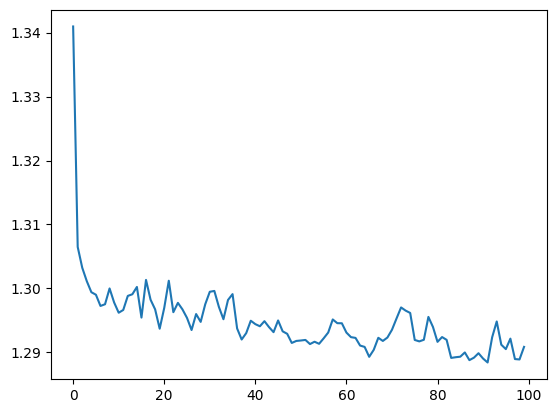

In [81]:
# batch_size = 1
plt.plot(all_losses)
plt.show()

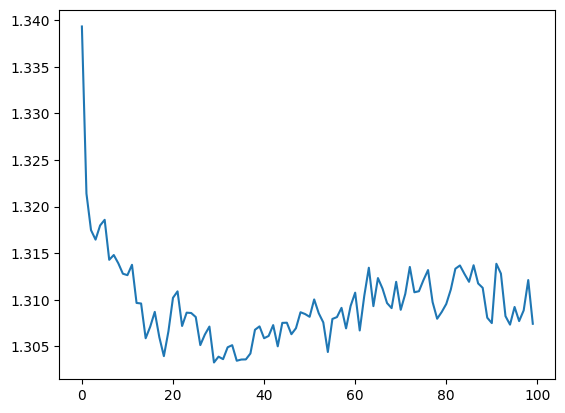

In [83]:
# batch_size = 25
plt.plot(all_losses)
plt.show()

In [ ]:
pickle.dump(model, open('models/LSTM.pkl','wb'))